## Import the Data

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

In [3]:
# Importing the data to the CSV file
# Add the setting for the DatetimeIndex
whale_navs_df = pd.read_csv(Path("Resources/whale_navs.csv"),
                           index_col="date",
                           parse_dates=True,
                           infer_datetime_format=True
                           )

# The first 5 rows
whale_navs_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [5]:
# Declaring the analysis as daily returns
# Dropping all missing values
daily_returns = whale_navs_df.pct_change().dropna()

# The first five daily returns
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


## Quantitative Analysis

<AxesSubplot:title={'center':'Daily Returns of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc, S&P 500 - 2014-2020'}, xlabel='Date'>

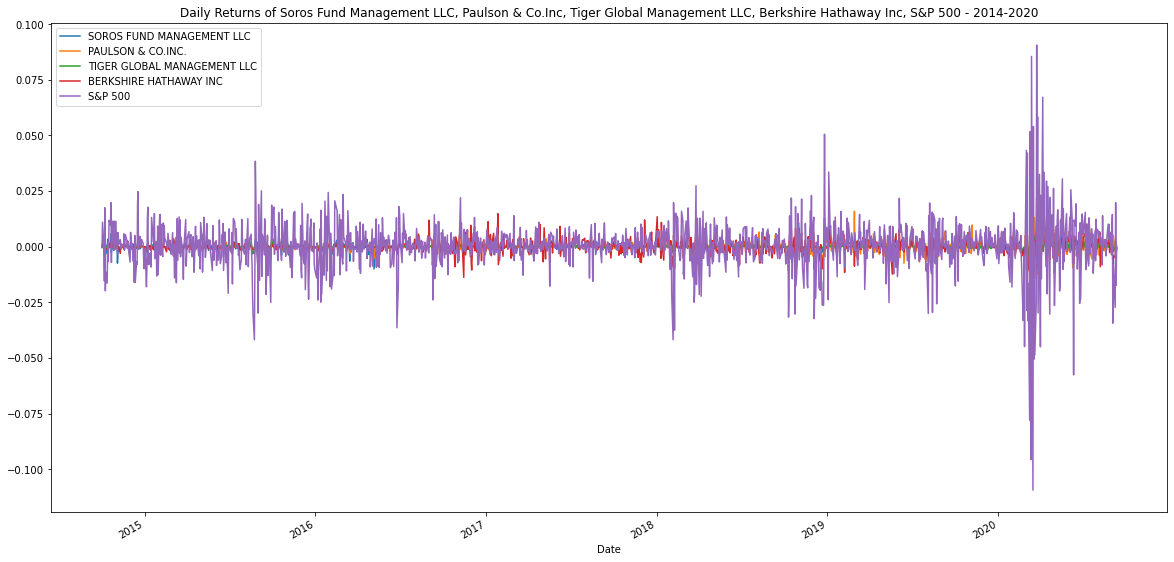

In [22]:
# Plotting the daily return data of the 4 funds and the S&P 500
daily_returns.plot(figsize=(20,10), title="Daily Returns of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc, S&P 500 - 2014-2020", xlabel='Date')

In [13]:
# The cumulative returns of the 4 funds and the S&P 500
cumulative = (1 + daily_returns).cumprod()

#Displaying the last 5 cumulative returns
cumulative.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


<AxesSubplot:title={'center':'Cumulative Returns of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc, S&P 500 - 2014-2020'}, xlabel='Date', ylabel='Percentage Return'>

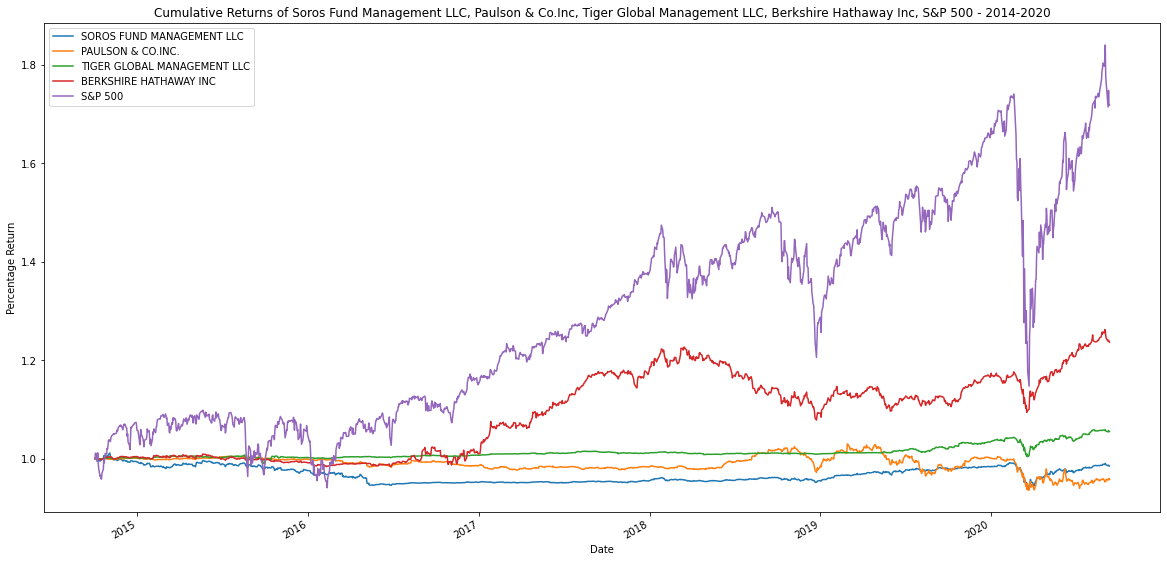

In [19]:
# Plotting the cumulative return
cumulative.plot(figsize=(20,10),title="Cumulative Returns of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc, S&P 500 - 2014-2020", xlabel='Date', ylabel='Percentage Return')

Based on the graph, the only time the funds outperform the S&P 500 was shortlived in 2015 and 2016. After that the S&P 500 outperformed every fund. 

## Analyze the Volatility

<AxesSubplot:title={'center':'Daily Returns of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc, S&P 500 - 2014-2020'}>

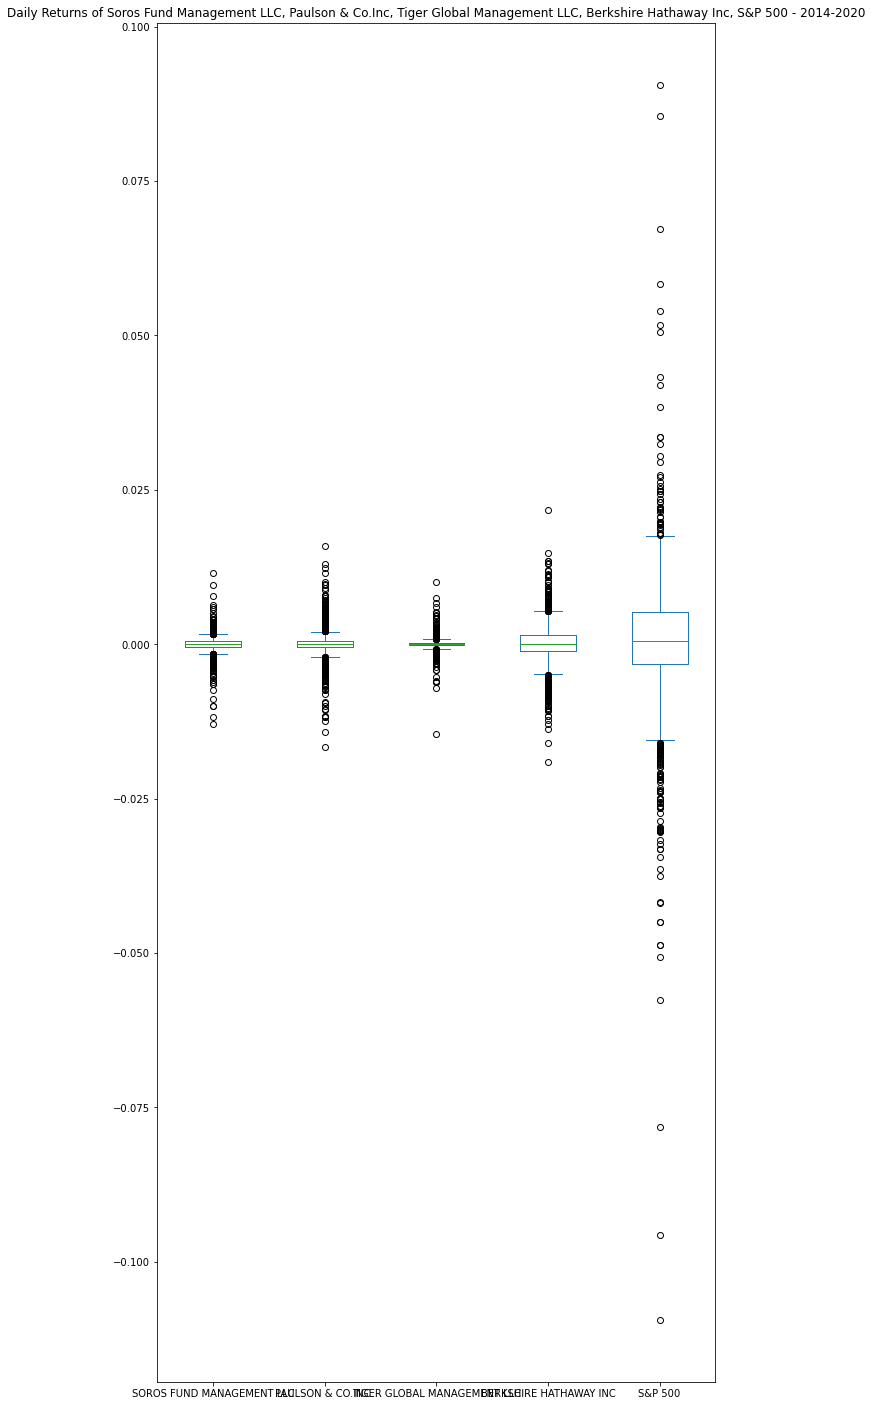

In [32]:
# Using the daily returns data, we create a box graph to visualize the volatility of the 4 funds and the S&P 500
daily_returns.plot(kind='box', figsize=(10,25), title="Daily Returns of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc, S&P 500 - 2014-2020")

In [27]:
# Creating a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 from the previous DataFrame
funds_returns = daily_returns.drop(columns="S&P 500")

# Displaying the first rows of the new DataFrame
funds_returns.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171
2014-10-03,0.001052,0.000368,0.000394,0.001248
2014-10-06,0.002456,-0.000008,0.000066,0.000267
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587
2014-10-08,0.000390,0.000369,0.000242,0.000842


<AxesSubplot:title={'center':'Daily Returns of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc - 2014-2020'}>

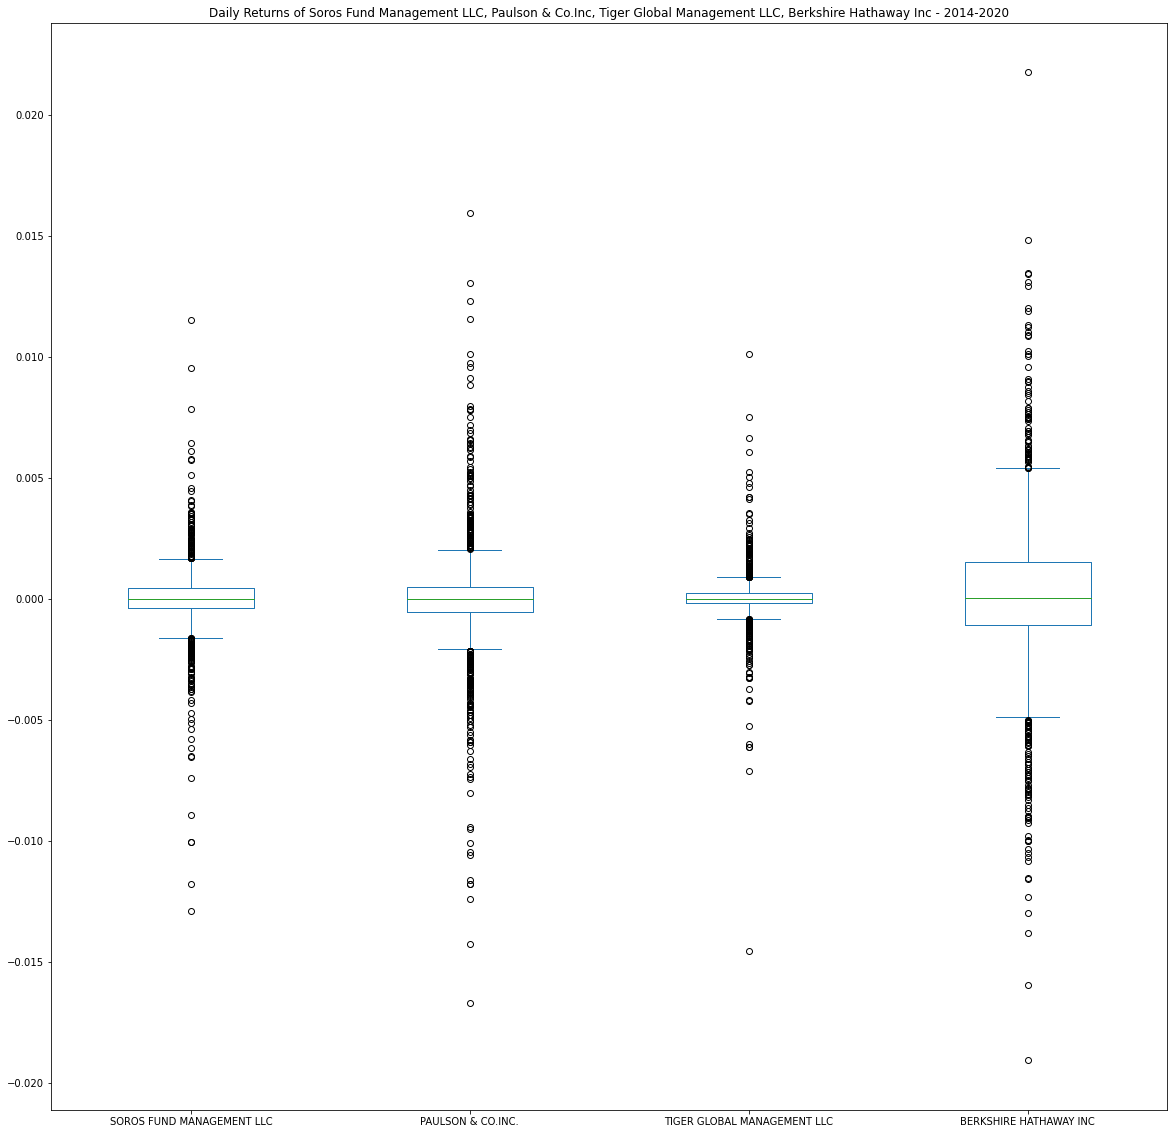

In [33]:
# A box plot to visulaize the 4 funds daily returns
funds_returns.plot(kind='box', figsize=(20,20), title='Daily Returns of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc - 2014-2020')

Based on the box graph we see the portfolio with the most volatile is Berkshire Hathaway Inc. and the one with the least volatile is Tiger Global Management LLC.

## Analyzing the Risk

In [34]:
# Calculating the standard deviation of all 4 portfolios and the S&P 500
standard_deviation = daily_returns.std()

#Sorting them from least to greatest
standard_deviation.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [35]:
# Calculating the annual standard deviation of the portfolios and the S&P 500
annual_standard_deviation = standard_deviation * np.sqrt(252)

#Sorting them from least to greatest
annual_standard_deviation.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc, S&P 500 - 2014-2020'}, xlabel='date'>

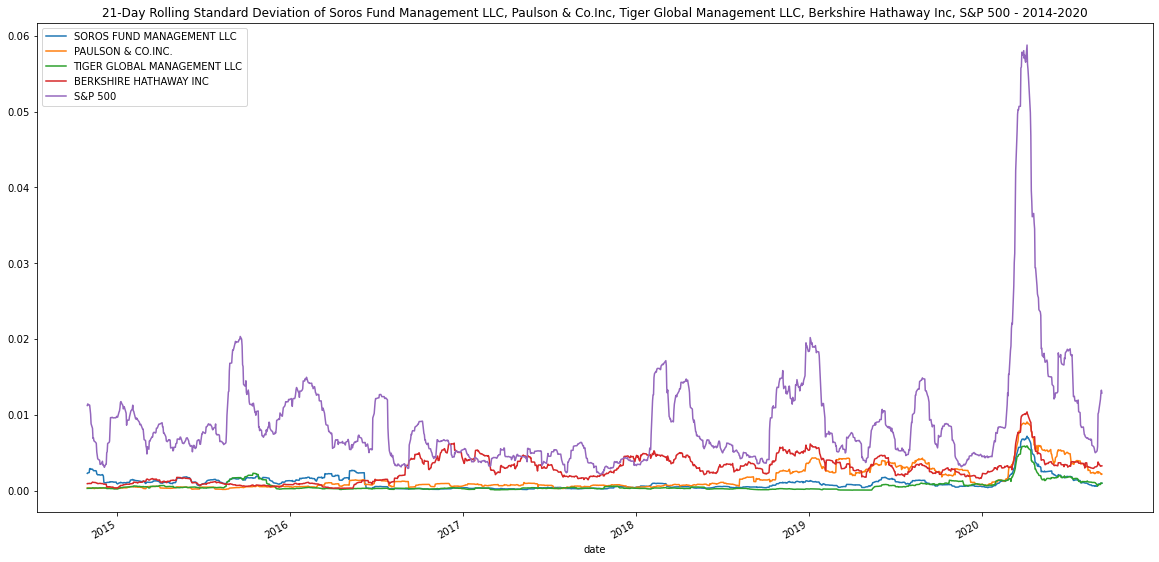

In [39]:
# Using the daily returns Dataframe and a 21-day rolling window, we will plot the rolling standard deviation of the 4 portfolios and the S&P 500
daily_returns.rolling(window=21).std().plot(figsize=(20,10), title="21-Day Rolling Standard Deviation of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc, S&P 500 - 2014-2020")

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc - 2014-2020'}, xlabel='date'>

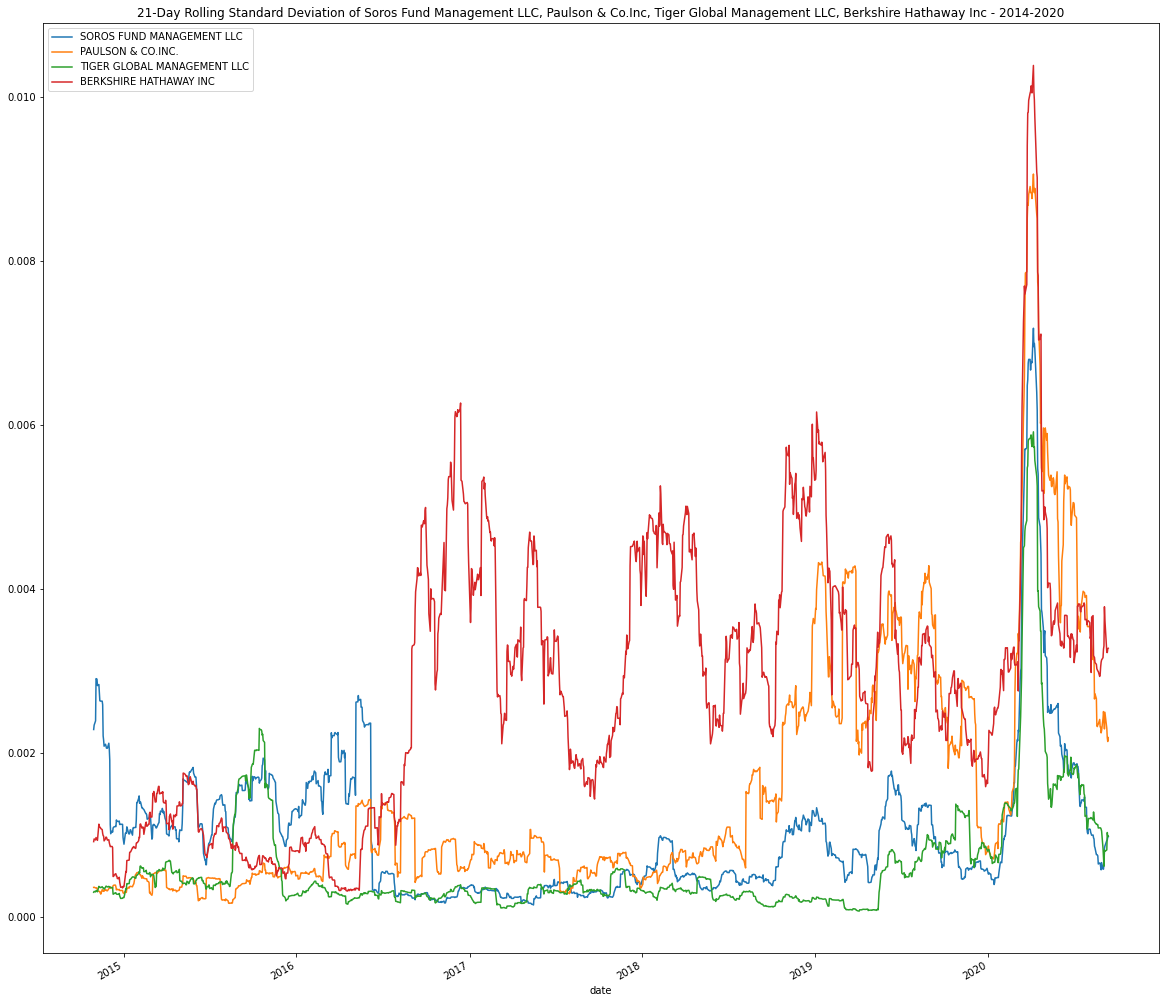

In [40]:
# Using the daily returns Dataframe and a 21-day rolling window, we will plot the rolling standard deviation of the 4 portfolios
funds_returns.rolling(window=21).std().plot(figsize=(20,19), title="21-Day Rolling Standard Deviation of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc - 2014-2020")

According to the graph Berkshire Hathaway Inc. poses the most risk above the other portfolios.

The only time all portfolios showed risk at the same time was in the year 2020, In other times most of the time they all posed high risk at different times.

In the year 2015 the portfolio the posed most risk was Soros Fund Management LLC and before 2016 there was a spike showing higher risk than Soros Fund Management LLC was Tiger Global Management LLC. In mid 2016 the portfolio that started to pose the most risk was Berkshire Hathaway Inc. Them in mid-2019 Paulson & Co.Inc posed the most risk a few times and in 2020.

## Analyzing the Risk-Return Profiles

In [42]:
# Calculating the annual average return for the 4 fund portfolios and the S&P 500
annual_avg_return = daily_returns.mean() * 252

#Sorting the annual avg. returns from least to greatest
annual_avg_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [43]:
# Calculating the annualied Sharpe Ratios for each of the 4 portoflios and the S&P 500
annual_sharpe_ratio = annual_avg_return / annual_standard_deviation

#Sorting the annual sharpe ratio from least to greatest
annual_sharpe_ratio.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Annual Sharpe Ratios of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc, S&P 500 - 2014-2020'}>

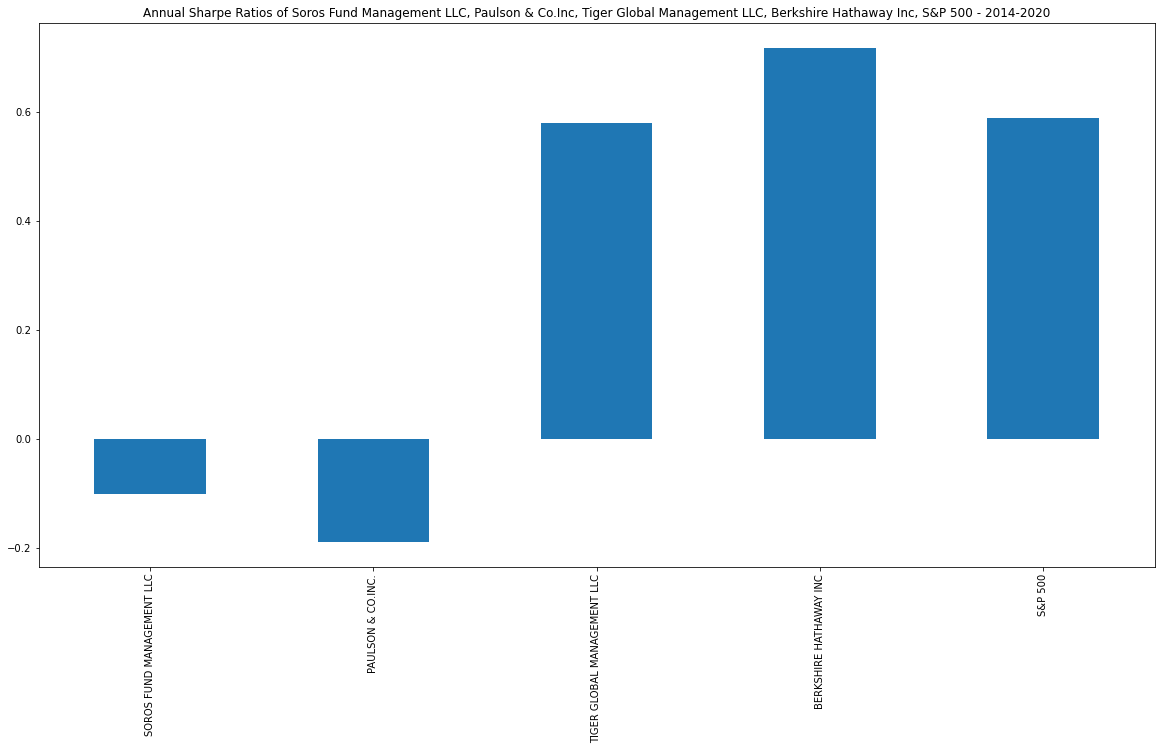

In [49]:
#Sharpe ratios bar chart of the 4 portfolios and S&P 500
annual_sharpe_ratio.plot.bar(figsize=(20,10), title="Annual Sharpe Ratios of Soros Fund Management LLC, Paulson & Co.Inc, Tiger Global Management LLC, Berkshire Hathaway Inc, S&P 500 - 2014-2020")

As represnted in the bar chart, Berkshire Hathaway Inc. offers the best risk-return. On the other hand, Paulson & Co.Inc. offers the worst risk-return.

## Diversify the Portfolio


In [57]:
# Calculating the variance of the S&P 500 using a rolling 60-day window
snp_variance = daily_returns["S&P 500"].rolling(window=60).var().dropna()

# Displying the last rows 
snp_variance.tail(5)

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

### Portfolio 1:
### Berkshire Hathaway Inc.

In [58]:
# Calculating the covariance using a 60-day rolling window
berkshire_cov = daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(daily_returns['S&P 500'])

#Display last 5 rows
berkshire_cov.tail(5)

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [60]:
# Calculating the beta of portfolio 1
berkshire_beta = berkshire_cov / snp_variance

#Display the last 5 rows
berkshire_beta.tail(5)

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [61]:
# Calculating the avg. of the 60-day rolling beta
berkshire_beta.mean()

0.2214986101354593

<AxesSubplot:title={'center':'Berkshire Hathaway Inc. 60-Day Rolling Beta'}, xlabel='date'>

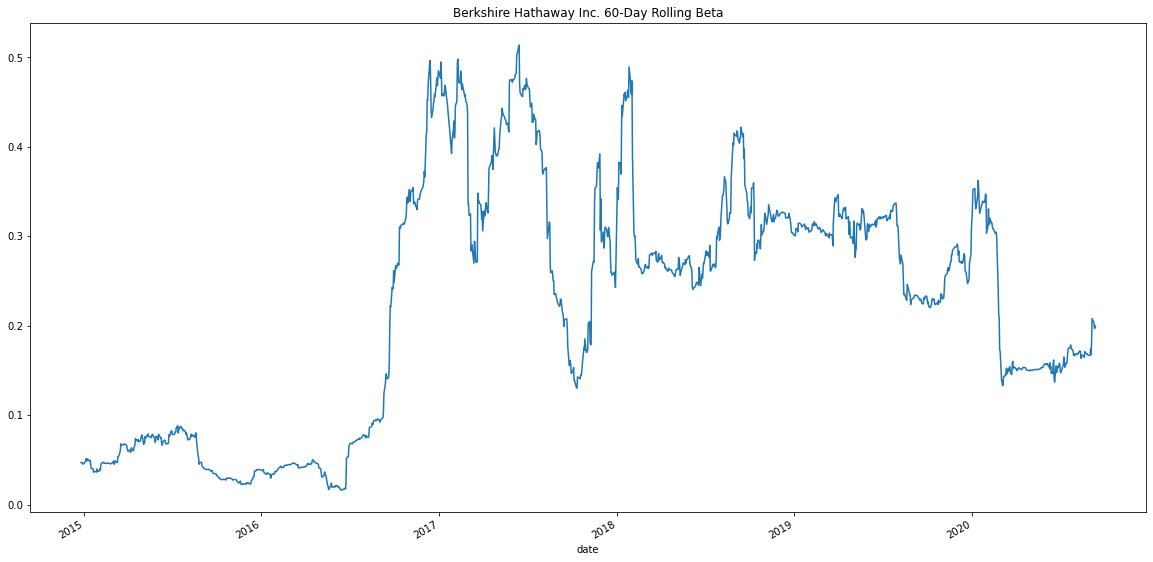

In [62]:
berkshire_beta.plot(figsize=(20,10), title="Berkshire Hathaway Inc. 60-Day Rolling Beta")

### Portfolio 2: 
### Soros Fund Management LLC

In [63]:
# Calculating the covariance using a 60-day rolling window
soros_cov = daily_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(daily_returns['S&P 500'])

#Display last 5 rows
soros_cov.tail(5)

date
2020-09-04    0.000009
2020-09-08    0.000010
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [65]:
# Calculating the beta of portfolio 2
soros_beta = soros_cov / snp_variance

#Display the last 5 rows
soros_beta.tail(5)

date
2020-09-04    0.086995
2020-09-08    0.084035
2020-09-09    0.081876
2020-09-10    0.082832
2020-09-11    0.082554
dtype: float64

In [66]:
# Calculating the avg. of the 60-day rolling beta
soros_beta.mean()

0.0686227172631973

<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC 60-Day Rolling Beta'}, xlabel='date'>

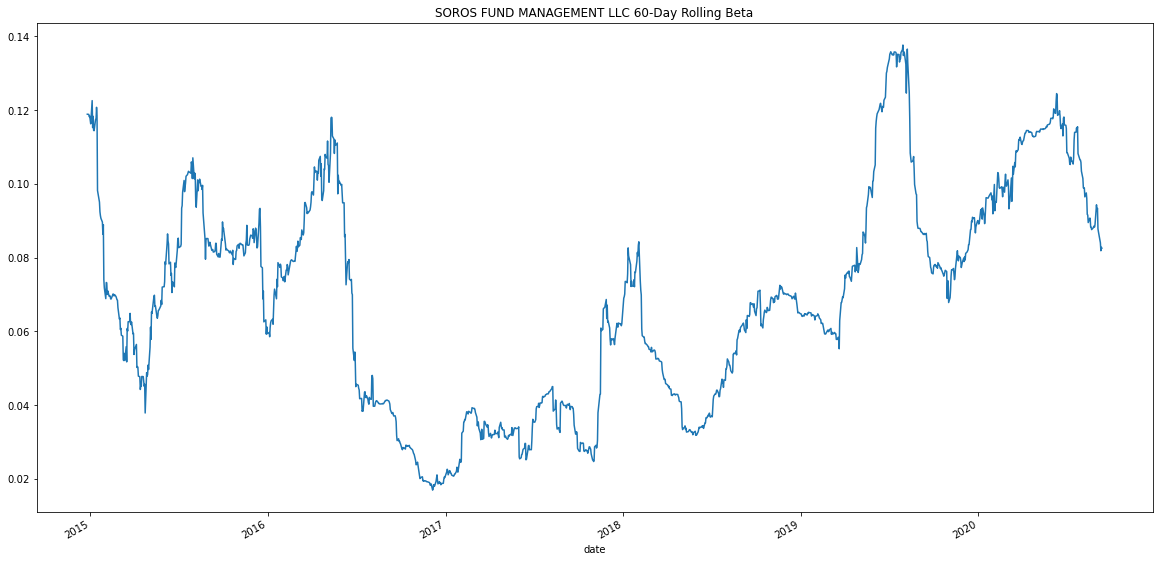

In [71]:
soros_beta.plot(figsize=(20,10), title="SOROS FUND MANAGEMENT LLC 60-Day Rolling Beta")

### Portfolio 3:
### Paulson & Co.Inc.

In [68]:
# Calculating the covariance using a 60-day rolling window
paulson_cov = daily_returns["PAULSON & CO.INC."].rolling(window=60).cov(daily_returns['S&P 500'])

#Display last 5 rows
paulson_cov.tail(5)

date
2020-09-04    0.000009
2020-09-08    0.000010
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [69]:
# Calculating the beta of portfolio 2
paulson_beta = paulson_cov / snp_variance

#Display the last 5 rows
paulson_beta.tail(5)

date
2020-09-04    0.085217
2020-09-08    0.087760
2020-09-09    0.084976
2020-09-10    0.084373
2020-09-11    0.083657
dtype: float64

In [70]:
# Calculating the avg. of the 60-day rolling beta
paulson_beta.mean()

0.07767796326036529

<AxesSubplot:title={'center':'PAULSON & CO.INC. 60-Day Rolling Beta'}, xlabel='date'>

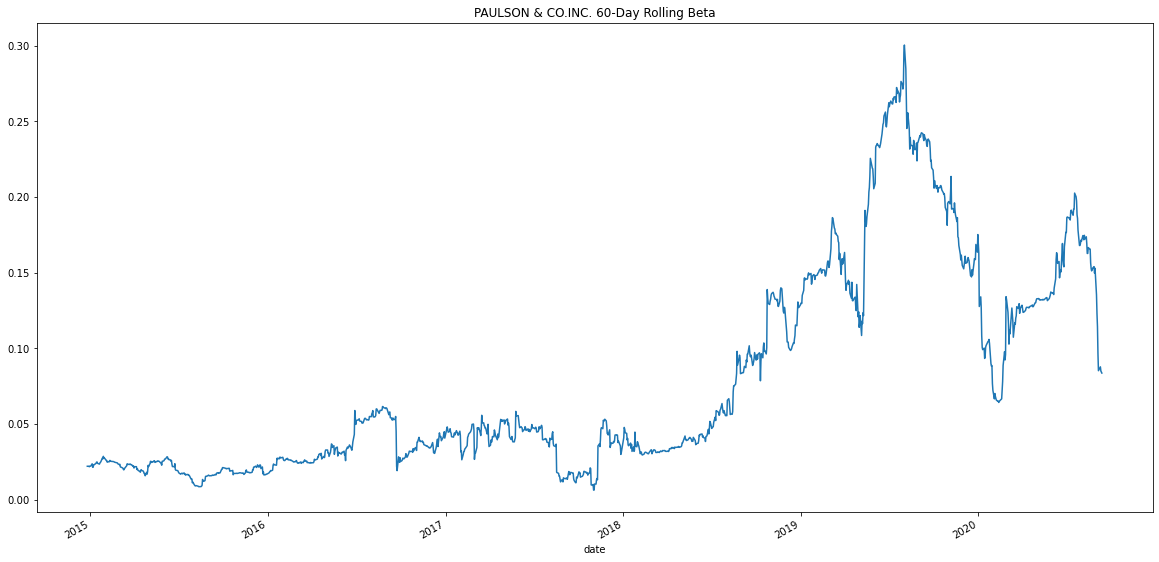

In [72]:
paulson_beta.plot(figsize=(20,10), title="PAULSON & CO.INC. 60-Day Rolling Beta")

### Portfolio:
### Tiger Global Management LLC

In [74]:
# Calculating the covariance using a 60-day rolling window
tiger_cov = daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(daily_returns['S&P 500'])

#Display last 5 rows
tiger_cov.tail(5)

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [75]:
# Calculating the beta of portfolio 2
tiger_beta = tiger_cov / snp_variance

#Display the last 5 rows
tiger_beta.tail(5)

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [76]:
# Calculating the avg. of the 60-day rolling beta
tiger_beta.mean()

0.03093001487238774

In [ ]:
tiger_beta.plot(figsize=(20,10), title="PAULSON & CO.INC. 60-Day Rolling Beta")

Out of the two portfolios from above. Berkshire Hathaway Inc. is the most sensetive to the movements of the S&P 500.

And Id recommend portfolio 1, due to its low volatility and high risk-return.